In [1]:
import os
import shutil
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Concatenate, Flatten, Dense
from tensorflow.keras import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
os.listdir('/Users/sivvagurunathan/Downloads/Student-engagement-dataset/Engaged/confused')

['0071.jpg',
 '0065.jpg',
 '0059.jpg',
 '0273.jpg',
 '0267.jpg',
 '0298.jpg',
 '0307.jpg',
 '0313.jpg',
 '0139.jpg',
 '0138.jpg',
 '0312.jpg',
 '0306.jpg',
 '0299.jpg',
 '0266.jpg',
 '0272.jpg',
 '0058.jpg',
 '0064.jpg',
 '0070.jpg',
 '0066.jpg',
 '0072.jpg',
 '0099.jpg',
 '0264.jpg',
 '0270.jpg',
 '0258.jpg',
 '0310.jpg',
 '0304.jpg',
 '0338.jpg',
 '0489.jpg',
 '0488.jpg',
 '0339.jpg',
 '0305.jpg',
 '0477.jpg',
 '0311.jpg',
 '0259.jpg',
 '0271.jpg',
 '0265.jpg',
 '0098.jpg',
 '0073.jpg',
 '0067.jpg',
 '0063.jpg',
 '0077.jpg',
 '0088.jpg',
 '0249.jpg',
 '0261.jpg',
 '0275.jpg',
 '0329.jpg',
 '0315.jpg',
 '0301.jpg',
 '0102.jpg',
 '0300.jpg',
 '0314.jpg',
 '0328.jpg',
 '0274.jpg',
 '0260.jpg',
 '0248.jpg',
 '0089.jpg',
 '0076.jpg',
 '0062.jpg',
 '0048.jpg',
 '0074.jpg',
 '0060.jpg',
 '0276.jpg',
 '0262.jpg',
 '0289.jpg',
 '0302.jpg',
 '0316.jpg',
 '0100.jpg',
 '0101.jpg',
 '0317.jpg',
 '0303.jpg',
 '0288.jpg',
 '0263.jpg',
 '0277.jpg',
 '0061.jpg',
 '0075.jpg',
 '0049.jpg',
 '0210.jpg',

In [3]:
path1=os.listdir('/Users/sivvagurunathan/Downloads/Student-engagement-dataset')[-2:]
path1

['Not engaged', 'Engaged']

In [4]:
path2=os.listdir('/Users/sivvagurunathan/Downloads/Student-engagement-dataset/Not engaged')[-3:]
path2

['Looking Away', 'bored', 'drowsy']

In [5]:
path3=os.listdir('/Users/sivvagurunathan/Downloads/Student-engagement-dataset/Engaged')[-3:]
path3

['frustrated', 'engaged', 'confused']

In [6]:
path4=os.listdir('/Users/sivvagurunathan/Downloads/Student-engagement-dataset/Engaged/frustrated')
path4

['0071.jpg',
 '0065.jpg',
 '0059.jpg',
 '0273.jpg',
 '0267.jpg',
 '0298.jpg',
 '0307.jpg',
 '0313.jpg',
 '0105.jpg',
 '0111.jpg',
 '0139.jpg',
 '0138.jpg',
 '0110.jpg',
 '0104.jpg',
 '0312.jpg',
 '0306.jpg',
 '0299.jpg',
 '0266.jpg',
 '0272.jpg',
 '0058.jpg',
 '0064.jpg',
 '0070.jpg',
 '0066.jpg',
 '0072.jpg',
 '0099.jpg',
 '0264.jpg',
 '0270.jpg',
 '0258.jpg',
 '0310.jpg',
 '0304.jpg',
 '0338.jpg',
 '0112.jpg',
 '0106.jpg',
 '0107.jpg',
 '0113.jpg',
 '0339.jpg',
 '0305.jpg',
 '0311.jpg',
 '0259.jpg',
 '0271.jpg',
 '0265.jpg',
 '0098.jpg',
 '0073.jpg',
 '0067.jpg',
 '0063.jpg',
 '0077.jpg',
 '0088.jpg',
 '0249.jpg',
 '0261.jpg',
 '0275.jpg',
 '0329.jpg',
 '0315.jpg',
 '0301.jpg',
 '0117.jpg',
 '0103.jpg',
 '0102.jpg',
 '0116.jpg',
 '0300.jpg',
 '0314.jpg',
 '0328.jpg',
 '0274.jpg',
 '0260.jpg',
 '0248.jpg',
 '0089.jpg',
 '0076.jpg',
 '0062.jpg',
 '0048.jpg',
 '0074.jpg',
 '0060.jpg',
 '0276.jpg',
 '0262.jpg',
 '0289.jpg',
 '0302.jpg',
 '0316.jpg',
 '0128.jpg',
 '0100.jpg',
 '0114.jpg',

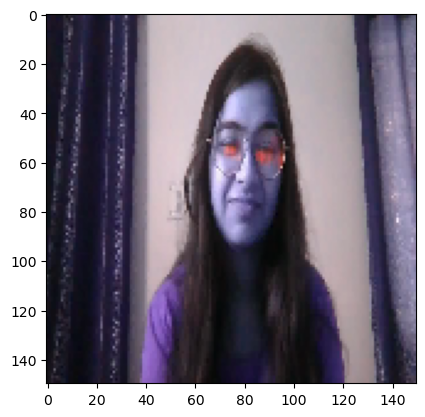

In [7]:
temp=cv2.imread(f'/Users/sivvagurunathan/Downloads/Student-engagement-dataset/Engaged/frustrated/0095.jpg')
temp1=cv2.resize(temp,(150,150))
plt.imshow(temp1)

In [14]:
dataset=[]
img_size=150
def funct():
    for i in os.listdir('/Users/sivvagurunathan/Downloads/Student-engagement-dataset')[-2:]:
        engagedrnot=i
        for j in os.listdir(f'/Users/sivvagurunathan/Downloads/Student-engagement-dataset/{i}')[-3:]:
            class_name=j
            for k in os.listdir(f'/Users/sivvagurunathan/Downloads/Student-engagement-dataset/{i}/{j}'):
                temp=cv2.imread(f'/Users/sivvagurunathan/Downloads/Student-engagement-dataset/{i}/{j}/{k}')
                new_temp=cv2.resize(temp,(img_size,img_size))
                dataset.append([new_temp,engagedrnot,class_name])

In [15]:
funct()

In [25]:
import pandas as pd
import random

In [17]:
df=pd.DataFrame(dataset)

In [23]:
df.head(10)

,0,1,2
0,"[[[118, 125, 122], [110, 117, 114], [119, 123,...",Not engaged,Looking Away
1,"[[[118, 123, 114], [112, 117, 108], [118, 121,...",Not engaged,Looking Away
2,"[[[117, 123, 118], [109, 115, 110], [116, 122,...",Not engaged,Looking Away
3,"[[[124, 134, 134], [118, 128, 128], [121, 126,...",Not engaged,Looking Away
4,"[[[127, 139, 133], [116, 128, 122], [114, 124,...",Not engaged,Looking Away
5,"[[[130, 137, 130], [124, 131, 124], [132, 134,...",Not engaged,Looking Away
6,"[[[135, 136, 132], [130, 131, 127], [126, 131,...",Not engaged,Looking Away
7,"[[[132, 136, 130], [128, 132, 126], [134, 135,...",Not engaged,Looking Away
8,"[[[119, 123, 117], [113, 117, 111], [115, 116,...",Not engaged,Looking Away
9,"[[[119, 125, 120], [113, 119, 114], [120, 121,...",Not engaged,Looking Away


In [19]:
dataset

[[array([[[118, 125, 122],
          [110, 117, 114],
          [119, 123, 118],
          ...,
          [125, 123, 123],
          [126, 124, 124],
          [125, 123, 123]],
  
         [[118, 125, 122],
          [110, 117, 114],
          [106, 110, 105],
          ...,
          [125, 123, 123],
          [126, 124, 124],
          [125, 123, 123]],
  
         [[118, 125, 122],
          [119, 126, 123],
          [106, 110, 105],
          ...,
          [128, 126, 126],
          [126, 124, 124],
          [124, 122, 122]],
  
         ...,
  
         [[ 95,  96,  92],
          [100, 101,  97],
          [101, 102,  98],
          ...,
          [ 84,  94, 104],
          [ 85,  91, 104],
          [ 79,  85,  98]],
  
         [[ 90,  91,  87],
          [ 95,  96,  92],
          [100, 101,  97],
          ...,
          [ 83,  93, 103],
          [ 86,  92, 105],
          [ 79,  85,  98]],
  
         [[ 90,  91,  87],
          [ 95,  96,  92],
          [100, 101,  97

In [54]:
random.shuffle(dataset)

In [58]:
df=pd.DataFrame(dataset)

In [59]:
df

,0,1,2
0,"[[[42, 20, 49], [42, 28, 31], [38, 21, 42], [3...",Engaged,frustrated
1,"[[[28, 22, 39], [25, 19, 36], [28, 17, 57], [2...",Engaged,frustrated
2,"[[[128, 135, 130], [124, 125, 126], [130, 131,...",Not engaged,Looking Away
3,"[[[133, 132, 128], [131, 130, 126], [129, 136,...",Not engaged,Looking Away
4,"[[[25, 23, 42], [24, 22, 41], [17, 23, 34], [1...",Engaged,frustrated
...,...,...,...
2115,"[[[35, 30, 45], [33, 28, 43], [32, 25, 46], [2...",Not engaged,bored
2116,"[[[127, 136, 133], [124, 133, 130], [129, 134,...",Not engaged,Looking Away
2117,"[[[132, 127, 154], [129, 124, 151], [118, 106,...",Engaged,confused
2118,"[[[35, 30, 51], [35, 30, 51], [56, 25, 52], [5...",Not engaged,bored


In [69]:
df[2]

0         frustrated
1         frustrated
2       Looking Away
3       Looking Away
4         frustrated
            ...     
2115           bored
2116    Looking Away
2117        confused
2118           bored
2119      frustrated
Name: 2, Length: 2120, dtype: object

In [70]:
from sklearn import preprocessing

In [71]:
label_encoder=preprocessing.LabelEncoder()

In [72]:
df['engaged_or_not']=label_encoder.fit_transform(df[1])
df['engaged_or_not'].nunique()

2

In [74]:
df['emotion']=label_encoder.fit_transform(df[2])
df['emotion'].nunique()

6

In [96]:
df

,0,engaged_or_not,emotion
0,"[[[42, 20, 49], [42, 28, 31], [38, 21, 42], [3...",0,5
1,"[[[28, 22, 39], [25, 19, 36], [28, 17, 57], [2...",0,5
2,"[[[128, 135, 130], [124, 125, 126], [130, 131,...",1,0
3,"[[[133, 132, 128], [131, 130, 126], [129, 136,...",1,0
4,"[[[25, 23, 42], [24, 22, 41], [17, 23, 34], [1...",0,5
...,...,...,...
2115,"[[[35, 30, 45], [33, 28, 43], [32, 25, 46], [2...",1,1
2116,"[[[127, 136, 133], [124, 133, 130], [129, 134,...",1,0
2117,"[[[132, 127, 154], [129, 124, 151], [118, 106,...",0,2
2118,"[[[35, 30, 51], [35, 30, 51], [56, 25, 52], [5...",1,1


In [75]:
df[0][0].min()

3

In [76]:
df[0][0].max()

255

In [90]:
df.drop([1,2],axis=1,inplace=True)

In [97]:
X=df[0]
y=df['emotion']

In [98]:
len(df)

2120

In [99]:
2120*(70/100)

1484.0

In [101]:
X_train=X_train/255
X_test=X_test/255

In [108]:
import numpy as np
X=df[0]
y=df['emotion']
X = np.array([x.flatten() for x in X])
X=X.astype('float32')
X1=tf.convert_to_tensor(X)
X1.shape

TensorShape([2120, 67500])

In [109]:
X_train=X1[:1480]
y_train=y[:1480]
X_test=X1[1480:]
y_test=y[1480:]

In [112]:
X_train = tf.reshape(X_train, (-1, 150, 150, 3))
X_test = tf.reshape(X_test, (-1, 150, 150, 3))

In [113]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (1,1), activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Conv2D(64, (1,1), activation='relu'),
    keras.layers.Conv2D(64, (3,3), activation='relu'), 
    keras.layers.MaxPooling2D(3,3),    
    keras.layers.Conv2D(128, (1,1), activation='relu'),
    keras.layers.Conv2D(128, (1,1), activation='relu'),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Conv2D(256, (1,1), activation='relu'),
    keras.layers.Conv2D(256, (5,5), activation='relu'),
    keras.layers.Flatten(), 
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dense(6, activation='softmax')  
])

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,tf.one_hot(y_train,depth=6),epochs=30,
           validation_data=(X_test,tf.one_hot(y_test,depth=6)),
           validation_split=0.1)

Epoch 1/30
47/47 [==============================] - 6s 124ms/step - loss: 1.5799 - accuracy: 0.7054 - val_loss: 0.2897 - val_accuracy: 0.8562
Epoch 2/30
47/47 [==============================] - 6s 122ms/step - loss: 0.1685 - accuracy: 0.9230 - val_loss: 0.0991 - val_accuracy: 0.9578
Epoch 3/30
47/47 [==============================] - 6s 121ms/step - loss: 0.1076 - accuracy: 0.9412 - val_loss: 0.1222 - val_accuracy: 0.9156
Epoch 4/30
47/47 [==============================] - 6s 120ms/step - loss: 0.1197 - accuracy: 0.9446 - val_loss: 0.0906 - val_accuracy: 0.9516
Epoch 5/30
47/47 [==============================] - 6s 121ms/step - loss: 0.1287 - accuracy: 0.9345 - val_loss: 0.1112 - val_accuracy: 0.9344
Epoch 6/30
47/47 [==============================] - 6s 122ms/step - loss: 0.1025 - accuracy: 0.9446 - val_loss: 0.0747 - val_accuracy: 0.9578
Epoch 7/30
47/47 [==============================] - 6s 120ms/step - loss: 0.0905 - accuracy: 0.9541 - val_loss: 0.0747 - val_accuracy: 0.9594
Epoch 

In [114]:
model.evaluate(X_test,tf.one_hot(y_test,depth=6))

20/20 [==============================] - 1s 28ms/step - loss: 0.0706 - accuracy: 0.9594


[0.07061059772968292, 0.9593750238418579]

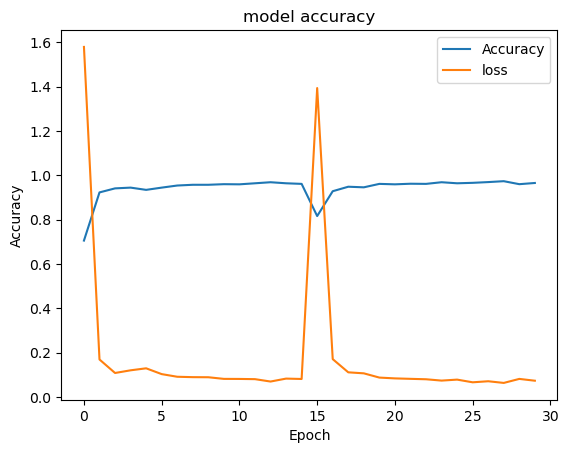

In [115]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

In [116]:
checkpoint = ModelCheckpoint("Student Engagement Model.h5", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=9, verbose=1, mode='auto')

In [117]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(32, (1,1), activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Conv2D(64, (1,1), activation='relu'),
    keras.layers.Conv2D(64, (3,3), activation='relu'), 
    keras.layers.MaxPooling2D(3,3),    
    keras.layers.Conv2D(128, (1,1), activation='relu'),
    keras.layers.Conv2D(128, (1,1), activation='relu'),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Conv2D(256, (1,1), activation='relu'),
    keras.layers.Conv2D(256, (5,5), activation='relu'),
    keras.layers.Flatten(), 
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dense(6, activation='softmax')  
])

model1.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

history1=model1.fit(X_train,tf.one_hot(y_train,depth=6),epochs=30,
           validation_data=(X_test,tf.one_hot(y_test,depth=6)),
           callbacks=[checkpoint,early_stopping])

Epoch 1/30
46/47 [============================>.] - ETA: 0s - loss: 2.5856 - accuracy: 0.5842
Epoch 1: val_accuracy improved from -inf to 0.94531, saving model to Student Engagement Model.h5
47/47 [==============================] - 6s 127ms/step - loss: 2.5734 - accuracy: 0.5851 - val_loss: 0.2123 - val_accuracy: 0.9453
Epoch 2/30
 1/47 [..............................] - ETA: 6s - loss: 0.1698 - accuracy: 0.9688

/Users/sivvagurunathan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


46/47 [============================>.] - ETA: 0s - loss: 0.1372 - accuracy: 0.9368
Epoch 2: val_accuracy improved from 0.94531 to 0.95781, saving model to Student Engagement Model.h5
47/47 [==============================] - 6s 125ms/step - loss: 0.1365 - accuracy: 0.9372 - val_loss: 0.0890 - val_accuracy: 0.9578
Epoch 3/30
46/47 [============================>.] - ETA: 0s - loss: 0.1210 - accuracy: 0.9463
Epoch 3: val_accuracy did not improve from 0.95781
47/47 [==============================] - 6s 122ms/step - loss: 0.1207 - accuracy: 0.9466 - val_loss: 0.0831 - val_accuracy: 0.9578
Epoch 4/30
46/47 [============================>.] - ETA: 0s - loss: 0.1195 - accuracy: 0.9463
Epoch 4: val_accuracy did not improve from 0.95781
47/47 [==============================] - 6s 124ms/step - loss: 0.1204 - accuracy: 0.9459 - val_loss: 0.0883 - val_accuracy: 0.9578
Epoch 5/30
46/47 [============================>.] - ETA: 0s - loss: 0.1032 - accuracy: 0.9450
Epoch 5: val_accuracy did not improve fr

In [118]:
model1.evaluate(X_test,tf.one_hot(y_test,depth=6))

20/20 [==============================] - 1s 28ms/step - loss: 0.1032 - accuracy: 0.9469


[0.10323069244623184, 0.9468749761581421]

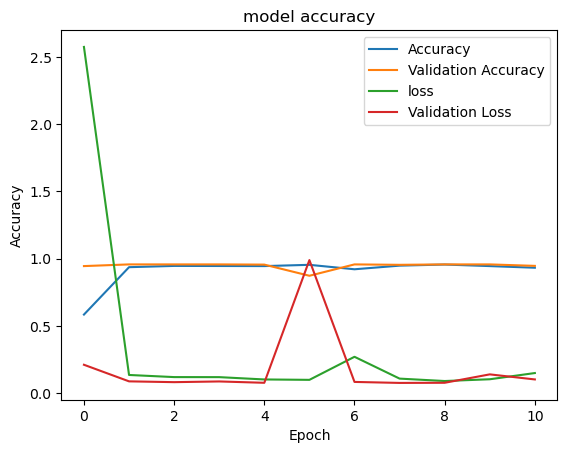

In [120]:
plt.plot(history1.history["accuracy"])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

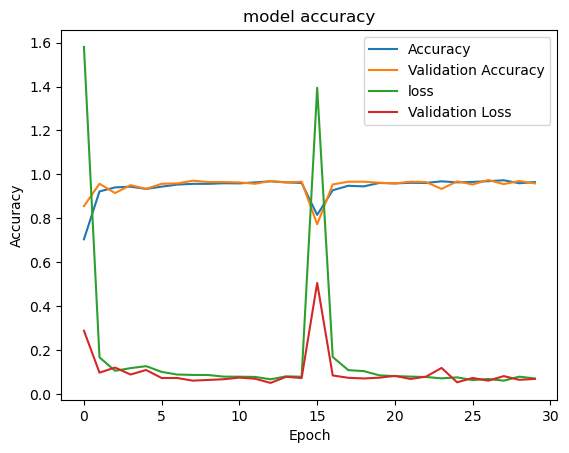

In [121]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()